# Pymaceuticals Inc.
---

### Analysis

- For this analysis, two positive findings were: there was a big "n", or number of times each drug effect was measured. Number of times males were tested versus the times females were tested was very similar.

- When comparing the tumor volumes accross treatments, a decrease in the tumor volumes of mice treated with Capomulin and Ramicane was observed. While there seems to be a significant difference with the tumor volumes of mice treated with Infubinol and Ceftamil, other statistical tests should be run to compare accross treatments.

- By following the changes in tumor volume of a mouse treated with Capomulin, the peak growth was reached at 20 days. After that, the mouse went through periods of regrowth and remission until the end of the study. To confirm this, other mice's changes in tumor growth should be evaluated.

- When performing a correlation and regression model between Final Tumor Volume and Weight of mice treated with Capomulin, a positive strong correlation (Pearson Coef = 0.84) was found. This means that mice with larger weights correlate with larger tumor volumes, and that this relationship between variables is linear, with and r squared = 0.7088.

**Overall, Capomulin drug has been proved to, at least cyclically, reduce the tumor volume, with results comparable to the drug Ramicane. Nevertheless, more studies or statistical tests need to be run to confirm these findings.**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_results = pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")
complete_results.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_number = complete_results["Mouse ID"].nunique()
print(f"Number of mice used in this study: {mice_number}")


# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
bad_mouse = complete_results.loc[complete_results.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(f"Mouse ID: {bad_mouse} was duplicated and was removed from the data set")


# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = complete_results[complete_results["Mouse ID"].isin(bad_mouse) == False]
g989_data = complete_results[complete_results["Mouse ID"] == "g989"]

# Showing data associated with this mouse
print(f"Values reported for this mouse were:\n{g989_data}")

# Checking the number of mice in the clean DataFrame.
new_micenumber = clean_results["Mouse ID"].nunique()
print(f"The new mice number is: {new_micenumber}")

Number of mice used in this study: 249
Mouse ID: ['g989'] was duplicated and was removed from the data set
Values reported for this mouse were:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26       

## Summary Statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumorvol = clean_results.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumorvol = clean_results.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumorvol = clean_results.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumorvol = clean_results.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"] 
sem_tumorvol = clean_results.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

tumor_dict = {
            "Mean Tumor Volume" : mean_tumorvol,
            "Median Tumor Volume" : median_tumorvol,
            "Tumor Volume Variance" : var_tumorvol,
            "Tumor Volume Std. Dev." : std_tumorvol,
            "Tumor Volume Std. Err." : sem_tumorvol,
}

# Assemble the resulting series into a single summary DataFrame.
tumorvol_summary = pd.DataFrame(tumor_dict)
tumorvol_summary.head(50)


# Using the aggregation method, produce the same summary statistics in a single line.
tumor_agg_summary = clean_results.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})
tumor_agg_summary.head(50)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

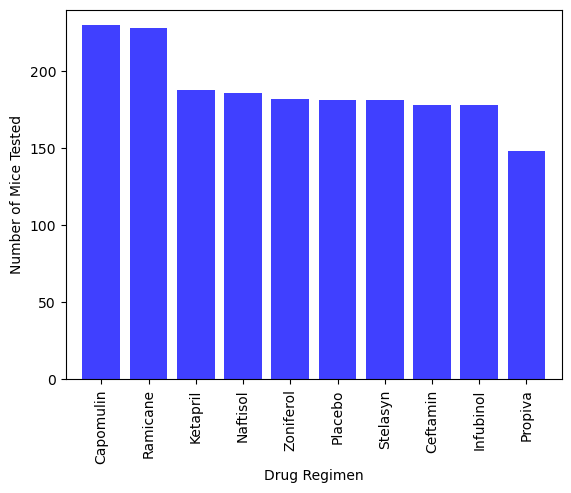

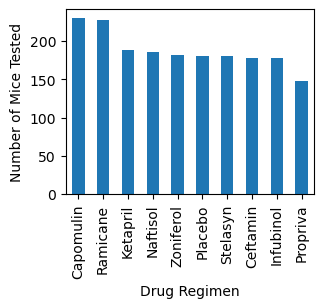

In [4]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = np.arange(len(clean_results.groupby(["Drug Regimen"])))

mice_tested = clean_results.groupby(["Drug Regimen"]).size()
y_axis = mice_tested.sort_values(axis=0, ascending=False)

drug_names = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propiva"]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation="vertical")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)

# Giving chart some labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.rcParams['figure.figsize'] = [3.2, 2.4]
plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")
plt.show();

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create a df with the data needed:
mice_tested_sorted = mice_tested.sort_values(axis=0, ascending=False)
drug_dict = {"Drug Regimen" : mice_tested_sorted}

drug_treatments_df = pd.DataFrame(drug_dict)
drug_treatments_df

# Use DataFrame.plot() in order to create a bar chart of the data
drug_treatments_df.plot(kind="bar", figsize=(3.2, 2.4), legend=False, ylabel="Number of Mice Tested");


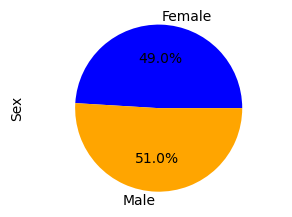

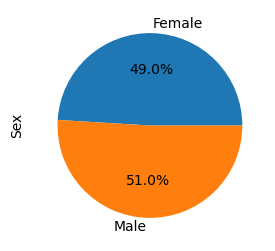

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Counting male and female rows, making labels and assigning colors
counts_sex = clean_results.groupby(["Sex"]).count()["Mouse ID"]
labels = counts_sex.index.values
colors = ["blue", "orange"]

# Plotting the chart, adding figure size and labels
plt.pie(counts_sex, labels=labels, colors=colors, autopct="%1.1f%%")
plt.rcParams['figure.figsize'] = [3, 3]
plt.axis("equal")
plt.ylabel("Sex");
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pyplot
# First counting the male and female rows
bysex_counts = clean_results.groupby(["Sex"]).count()["Mouse ID"]

# Plotting the graph
bysex_pie = bysex_counts.plot(kind="pie", use_index=True, legend=False, ylabel="Sex", autopct='%1.1f%%', figsize=(3, 3))


## Quartiles, Outliers and Boxplots

Infubinol has the following outliers: 36.3213458


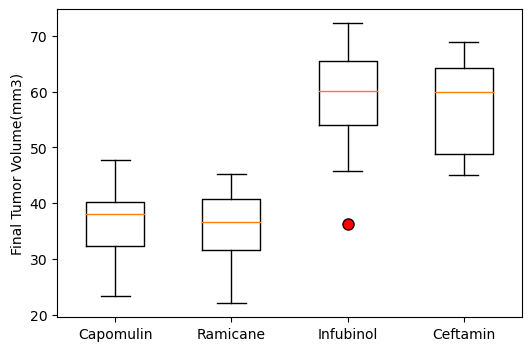

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Grouped by Mouse ID and Timepoint gives me a sorted list of each mouse and the timepoint
# Then I just grab the last row, because it cointains the highest timepoint of that particular mouse

forlast_timepoint = clean_results.groupby(["Mouse ID"])
final_tumorvol_df = forlast_timepoint.last()

# Selecting only needed columns -> storing in drugs_df
drugs_df = final_tumorvol_df[["Drug Regimen", "Tumor Volume (mm3)"]]

# Changing index to "Drug Regimen" -> dropping treatments I don't need
set_drugs_df = drugs_df.set_index("Drug Regimen")

# Dropping the treatments I don't need and setting index back
# Now new df fourdrugs_df has the same two columns but without the rest of the drugs
fourdrugs_df = set_drugs_df.drop(["Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"], axis=0).reset_index()


# Making a list with the treatments to loop and get the info and creating empty list to populate
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_list = []

# For loop
for drugs in treatments:
    # Creating series by drug treatment, using conditional and grabbing the tumor volume value
    drug_series = fourdrugs_df[fourdrugs_df["Drug Regimen"] == drugs]["Tumor Volume (mm3)"]
    
    # Appending the results to the empty list
    drug_list.append(drug_series.to_list())
    
    # Calculating the quartiles
    stats_drug_series = drug_series.quantile([.25, .5, .75])
    lowerq = stats_drug_series[0.25]
    upperq = stats_drug_series[0.75]
    iqr = upperq - lowerq
    
    # Calculating boundaries
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Getting outliers and printing them with an if statement
    # First set conditions. 
    # The if statement will only return lists that are not empty.
    drug_df_outliers = drug_series[(drug_series < lower_bound) | (drug_series > upper_bound)]
    if drug_df_outliers.to_list():
        print(f"{drugs} has the following outliers: {drug_df_outliers.values[0]}")
        

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=8)
plt.boxplot(drug_list, labels=treatments, flierprops=flierprops, widths=0.5);
plt.ylabel("Final Tumor Volume(mm3)");
plt.show()

## Line and Scatter Plots

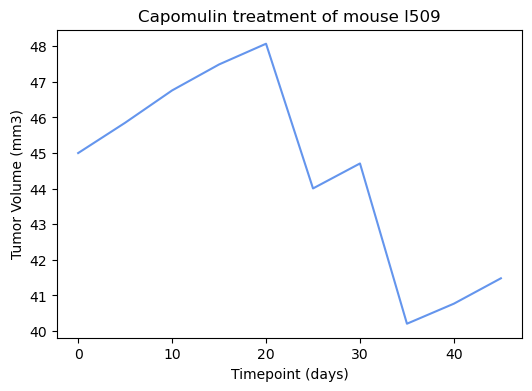

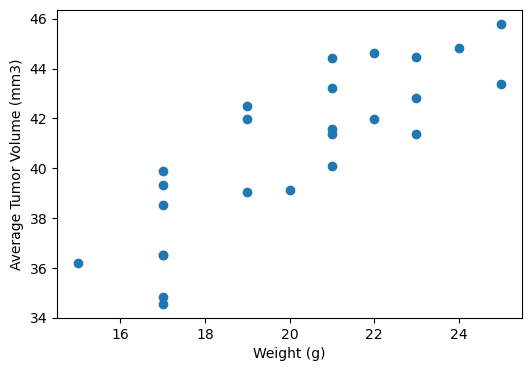

In [10]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Extract info associated to mouse l509
l509_data = clean_results[clean_results["Mouse ID"] == "l509"]

# Creating X and Y axis lists
timepoint = np.arange(0, 50, 5)
tumor_vol_l509 = l509_data["Tumor Volume (mm3)"].to_list()

# Plot and styling
l509_tumorsize, = plt.plot(timepoint, tumor_vol_l509, color="cornflowerblue")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)");
plt.show()

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Getting Capomulin mice
capo_mice = clean_results[clean_results["Drug Regimen"] == "Capomulin"]

capo_mice_grouped = capo_mice.groupby(["Mouse ID"])
weight = capo_mice_grouped["Weight (g)"].mean()
volume = capo_mice_grouped["Tumor Volume (mm3)"].mean()

capo_mice_dict = {"Weight" : weight,
                  "Volume" : volume,
                 }

capo_mice_df = pd.DataFrame(capo_mice_dict)

# Plotting 
plt.scatter(capo_mice_df.iloc[:, 0],capo_mice_df.iloc[:, 1])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
               


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.7088568047708723 and the model equation is: y = 0.95x + 21.55


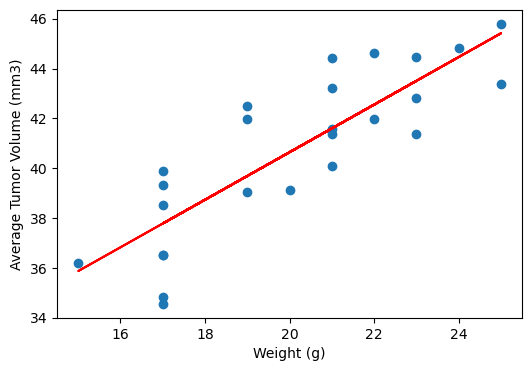

In [11]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Calculate the regression model
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
weight = capo_mice_grouped["Weight (g)"].mean()
volume = capo_mice_grouped["Tumor Volume (mm3)"].mean()

regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capo_mice_df.iloc[:, 0],capo_mice_df.iloc[:, 1])
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2} and the model equation is: {line_eq}")
plt.show()